In [319]:
from math import log, e
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad as integrate

# ZADANIE 1

## Funkcja charakterystyczna

In [320]:
def density(x, alpha, beta, gamma):
    return(alpha*gamma/beta*(x/beta)**(alpha-1)*(1-e**(-(x/beta)**alpha))**(gamma-1)*e**(-(x/beta)**alpha))

## Dystrybuanta

In [321]:
def distribution(t, alpha, beta, gamma):
    return((1-e**(-(t/beta)**alpha))**gamma)

## Funkcja kwantylowa

In [322]:
def quantile(p, alpha, beta, gamma):
    return(beta*(-log(1-p**(1/gamma)))**(1/alpha))

## Funkcja hazardu

In [323]:
def hazard(x, alpha, beta, gamma):
    return(density(x, alpha, beta, gamma)/(1-distribution(x, alpha, beta, gamma)))

# Zadanie 2

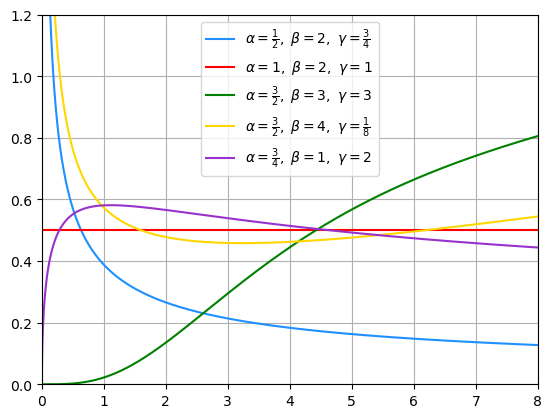

In [324]:
x = np.linspace(0.001, 8, 1000)
plt.ylim(0, 1.2)
plt.xlim(0, 8)
plt.plot(x, hazard(x, 1/2, 2, 3/4), color="dodgerblue", label=r"$\alpha = \frac{1}{2}, \ \beta = 2, \ \gamma = \frac{3}{4}$")
plt.plot(x, hazard(x, 1, 2, 1), color="red", label=r"$\alpha = 1, \ \beta = 2, \ \gamma = 1$")
plt.plot(x, hazard(x, 3/2, 3, 3), color="green", label=r"$\alpha = \frac{3}{2}, \ \beta = 3, \ \gamma = 3$")
plt.plot(x, hazard(x, 3/2, 4, 1/8), color="gold", label=r"$\alpha = \frac{3}{2}, \ \beta = 4, \ \gamma = \frac{1}{8}$")
plt.plot(x, hazard(x, 3/4, 1, 2), color="darkorchid", label=r"$\alpha = \frac{3}{4}, \ \beta = 1, \ \gamma = 2$")
plt.legend()
plt.grid()

# Zadanie 3

In [325]:
def generator(alpha, beta, gamma):
    return(quantile(np.random.uniform(), alpha, beta, gamma))   # [0;1] to opcja domyślna

# Zadanie 4

In [326]:
def ew(n, alpha, beta, gamma):

    x = np.array([generator(alpha, beta, gamma) for _ in range(n)])
    x_density = np.linspace(min(x), max(x), 1000)
    
    fig, ax = plt.subplots()
    
    ax.hist(x, bins=10, density = True, color="dodgerblue", alpha=0.5, label="Histogram")
    ax.plot(x_density, density(x_density, alpha, beta, gamma), color="red", label="Gęstość")
    ax.set_xlim(min(x), max(x))
    ax.set_title(fr"$\mathcal{{EW}} \left(\alpha={alpha}, \ \beta={beta}, \ \gamma={gamma} \right)$")
    ax.grid()
    ax.legend(loc="upper right")
    plt.show()

    return(x)

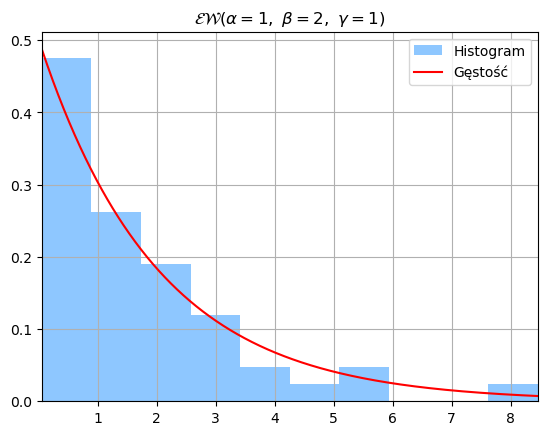

In [327]:
a1 = ew(50, 1, 2, 1)

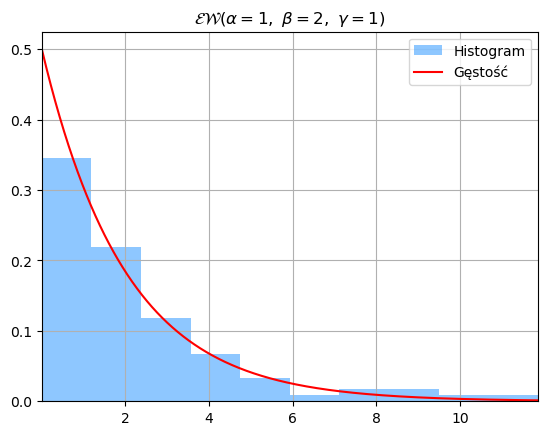

In [328]:
a2 = ew(100, 1, 2, 1)

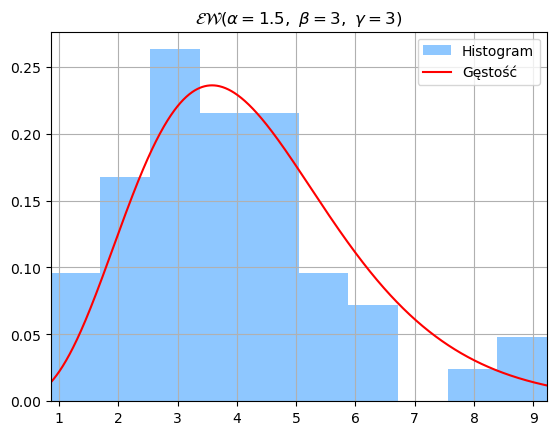

In [329]:
b1 = ew(50, 3/2, 3, 3)

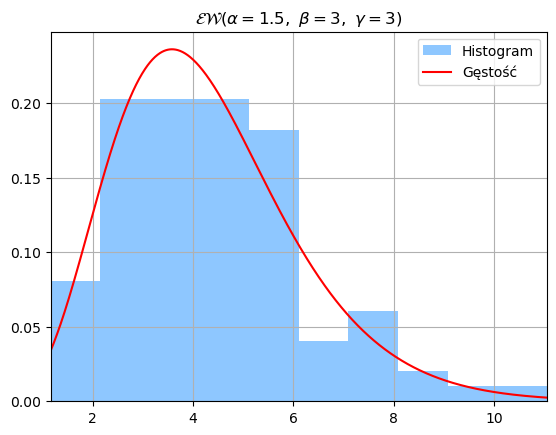

In [330]:
b2 = ew(100, 3/2, 3, 3)

# Zadanie 5

In [331]:
tabel1 = pd.DataFrame({
    "Statystyka": ["Średnia", "Odchylenie standardowe", "Kwartyl dolny", "Mediana", "Kwartyl górny", "Minimum", "Maksimum", "Rozstęp"],
    "Dane wygenerowane": [np.mean(a1), np.std(a1), np.quantile(a1, 0.25), np.quantile(a1, 0.5), np.quantile(a1, 0.75), min(a1), max(a1), max(a1)-min(a1)],
    "Dane teoretyczne": [integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0],
                        integrate(lambda x: x**2*density(x, 1, 2, 1), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0])**2,
                        quantile(0.25, 1, 2, 1), quantile(0.5, 1, 2, 1), quantile(0.75, 1, 2, 1), "-", "-", "-"]
})

In [332]:
tabel1.round(4)

,Statystyka,Dane wygenerowane,Dane teoretyczne
0,Średnia,1.7511,2.0
1,Odchylenie standardowe,1.7046,4.0
2,Kwartyl dolny,0.5271,0.575364
3,Mediana,1.0990,1.386294
4,Kwartyl górny,2.5010,2.772589
5,Minimum,0.0504,-
6,Maksimum,8.4627,-
7,Rozstęp,8.4124,-


In [333]:
tabel2 = pd.DataFrame({
    "Statystyka": ["Średnia", "Odchylenie standardowe", "Kwartyl dolny", "Mediana", "Kwartyl górny", "Minimum", "Maksimum", "Rozstęp"],
    "Dane wygenerowane": [np.mean(a2), np.std(a2), np.quantile(a2, 0.25), np.quantile(a2, 0.5), np.quantile(a2, 0.75), min(a2), max(a2), max(a2)-min(a2)],
    "Dane teoretyczne": [integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0],
                        integrate(lambda x: x**2*density(x, 1, 2, 1), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0])**2,
                        quantile(0.25, 1, 2, 1), quantile(0.5, 1, 2, 1), quantile(0.75, 1, 2, 1), "-", "-", "-"]
})

In [334]:
tabel2.round(4)

,Statystyka,Dane wygenerowane,Dane teoretyczne
0,Średnia,2.2508,2.0
1,Odchylenie standardowe,2.2717,4.0
2,Kwartyl dolny,0.8387,0.575364
3,Mediana,1.4013,1.386294
4,Kwartyl górny,3.0884,2.772589
5,Minimum,0.0004,-
6,Maksimum,11.8612,-
7,Rozstęp,11.8608,-


In [335]:
tabel3 = pd.DataFrame({
    "Statystyka": ["Średnia", "Odchylenie standardowe", "Kwartyl dolny", "Mediana", "Kwartyl górny", "Minimum", "Maksimum", "Rozstęp"],
    "Dane wygenerowane": [np.mean(b1), np.std(b1), np.quantile(b1, 0.25), np.quantile(b1, 0.5), np.quantile(b1, 0.75), min(b1), max(b1), max(b1)-min(b1)],
    "Dane teoretyczne": [integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0],
                        integrate(lambda x: x**2*density(x, 1.5, 3, 3), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0])**2,
                        quantile(0.25, 1.5, 3, 3), quantile(0.5, 1.5, 3, 3), quantile(0.75, 1.5, 3, 3), "-", "-", "-"]
})

In [336]:
tabel3.round(4)

,Statystyka,Dane wygenerowane,Dane teoretyczne
0,Średnia,3.9062,4.308447
1,Odchylenie standardowe,1.7851,3.303531
2,Kwartyl dolny,2.7629,2.98828
3,Mediana,3.4931,4.066969
4,Kwartyl górny,4.6688,5.365842
5,Minimum,0.8620,-
6,Maksimum,9.2249,-
7,Rozstęp,8.3629,-


In [337]:
tabel4 = pd.DataFrame({
    "Statystyka": ["Średnia", "Odchylenie standardowe", "Kwartyl dolny", "Mediana", "Kwartyl górny", "Minimum", "Maksimum", "Rozstęp"],
    "Dane wygenerowane": [np.mean(b2), np.std(b2), np.quantile(b2, 0.25), np.quantile(b2, 0.5), np.quantile(b2, 0.75), min(b2), max(b2), max(b2)-min(b2)],
    "Dane teoretyczne": [integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0],
                        integrate(lambda x: x**2*density(x, 1.5, 3, 3), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0])**2,
                        quantile(0.25, 1.5, 3, 3), quantile(0.5, 1.5, 3, 3), quantile(0.75, 1.5, 3, 3), "-", "-", "-"]
})

In [338]:
tabel4.round(4)

,Statystyka,Dane wygenerowane,Dane teoretyczne
0,Średnia,4.4857,4.308447
1,Odchylenie standardowe,1.8282,3.303531
2,Kwartyl dolny,3.0981,2.98828
3,Mediana,4.3510,4.066969
4,Kwartyl górny,5.5272,5.365842
5,Minimum,1.1665,-
6,Maksimum,11.0463,-
7,Rozstęp,9.8797,-


# Zadanie dodatkowe 1

In [339]:
# n = ilość przedziałów, zatem liczba punktów = n+1
#Liczba punktów musi być nieparzysta, zatem liczba przedziałów musi być parzysta

def metoda_parabol(a, b, funkcja, n):

    if n%2 != 0: raise Exception("Liczba przedziałów musi być parzysta")
    
    x_punkty = np.linspace(a, b, n+1)
    #y_punkty = funkcja(x_punkty)
    y_punkty = []
    for i in x_punkty: y_punkty.append(funkcja(i))
    
    h = (b-a)/(n)
    calka = 0
    calka += y_punkty[0]
    parzyste = False
    
    for i in range(1, n):
        if parzyste:
            calka += 2*y_punkty[i]
            parzyste = False
        else:
            calka += 4*y_punkty[i]
            parzyste = True

    calka += y_punkty[n]
    calka = h*calka/3
    
    return(calka)

In [340]:
def expected_value(alpha, beta, gamma, moment = 1):
    return(metoda_parabol(0, 10**3, lambda x: x**moment * density(x, alpha, beta, gamma), 10**5))

In [341]:
def variance(alpha, beta, gamma):
    return(expected_value(alpha, beta, gamma, 2) - expected_value(alpha, beta, gamma)**2)

In [342]:
expected_value(1, 2, 1), integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0]

(1.9999999999791331, 2.0000000000000004)

In [343]:
variance(1, 2, 1), integrate(lambda x: x**2*density(x, 1, 2, 1), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1, 2, 1), 0, 1e3)[0])**2

(4.000000000166656, 4.0)

In [344]:
expected_value(1.5, 3, 3), integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0]

(4.308446559643135, 4.308446559625358)

In [345]:
variance(1.5, 3, 3), integrate(lambda x: x**2*density(x, 1.5, 3, 3), 0, 1e3)[0]-(integrate(lambda x: x*density(x, 1.5, 3, 3), 0, 1e3)[0])**2

(3.3035307631750115, 3.3035307633324322)

# Zadanie dodatkowe 2